<a href="https://colab.research.google.com/github/A790227/data-project-llm/blob/main/Untitled0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Preprocessing

#### Removing punctuation, tokenizing text, and removing stopwords from the IMDb dataset, you can use nltk or spacy

- Loading IMDb dataset: Load the imdb dataset using load_dataset from Hugging Face.
- Tokenization: nltk's word_tokenize splits the text into individual words.
- Stopword Removal: Filter out common words like "the", "is", "and", etc.
- Punctuation Removal: Using string.punctuation to eliminate punctuation tokens.

In [9]:
from datasets import load_dataset
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

# Load the IMDb dataset
ds = load_dataset('imdb', split='train')  # Use 'train' split for demonstration

# Prepare stop words and punctuation
stop_words = set(stopwords.words('english'))
punctuation = string.punctuation

def preprocess_text(text):
    # Tokenize the text
    tokens = word_tokenize(text.lower())  # Convert to lowercase

    # Remove punctuation and stopwords
    cleaned_tokens = [
        token for token in tokens
        if token not in punctuation and token not in stop_words
    ]
    return cleaned_tokens

# Example: Preprocess the first review in the dataset
sample_review = ds[0]['text']
print("Original Review:", sample_review)

processed_review = preprocess_text(sample_review)
print("\nProcessed Tokens:", processed_review)


Original Review: I rented I AM CURIOUS-YELLOW from my video store because of all the controversy that surrounded it when it was first released in 1967. I also heard that at first it was seized by U.S. customs if it ever tried to enter this country, therefore being a fan of films considered "controversial" I really had to see this for myself.<br /><br />The plot is centered around a young Swedish drama student named Lena who wants to learn everything she can about life. In particular she wants to focus her attentions to making some sort of documentary on what the average Swede thought about certain political issues such as the Vietnam War and race issues in the United States. In between asking politicians and ordinary denizens of Stockholm about their opinions on politics, she has sex with her drama teacher, classmates, and married men.<br /><br />What kills me about I AM CURIOUS-YELLOW is that 40 years ago, this was considered pornographic. Really, the sex and nudity scenes are few and

#### Stemming and Lemmatization
- Stemming: Uses the PorterStemmer from NLTK to reduce words to their root form (e.g., running → run).
- Lemmatization: Uses spaCy's pre-trained model to return the base form of words (e.g., better → good). Unlike stemming, lemmatization considers the context and is generally more accurate.
- Tokenization and Stopword Removal: Splits the text into tokens and removes common stopwords like "the", "is", and punctuation.

In [10]:
from datasets import load_dataset
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
import string
import spacy

# Load spaCy's small English model for lemmatization
nlp = spacy.load("en_core_web_sm")

# Load the IMDb dataset
ds = load_dataset('imdb', split='train')

# Initialize tools
stop_words = set(stopwords.words('english'))
punctuation = string.punctuation
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

def preprocess_text(text, apply_stemming=True, apply_lemmatization=True):
    # Tokenize the text and convert to lowercase
    tokens = word_tokenize(text.lower())

    # Remove punctuation and stopwords
    cleaned_tokens = [
        token for token in tokens
        if token not in punctuation and token not in stop_words
    ]

    # Apply stemming
    if apply_stemming:
        cleaned_tokens = [stemmer.stem(token) for token in cleaned_tokens]

    # Apply lemmatization
    if apply_lemmatization:
        doc = nlp(" ".join(cleaned_tokens))  # Process with spaCy
        cleaned_tokens = [token.lemma_ for token in doc]

    return cleaned_tokens

# Example: Preprocess the first review in the dataset
sample_review = ds[0]['text']
print("Original Review:", sample_review)

# Apply preprocessing with stemming and lemmatization
processed_review = preprocess_text(sample_review)
print("\nProcessed Tokens (Stemmed and Lemmatized):", processed_review)

Original Review: I rented I AM CURIOUS-YELLOW from my video store because of all the controversy that surrounded it when it was first released in 1967. I also heard that at first it was seized by U.S. customs if it ever tried to enter this country, therefore being a fan of films considered "controversial" I really had to see this for myself.<br /><br />The plot is centered around a young Swedish drama student named Lena who wants to learn everything she can about life. In particular she wants to focus her attentions to making some sort of documentary on what the average Swede thought about certain political issues such as the Vietnam War and race issues in the United States. In between asking politicians and ordinary denizens of Stockholm about their opinions on politics, she has sex with her drama teacher, classmates, and married men.<br /><br />What kills me about I AM CURIOUS-YELLOW is that 40 years ago, this was considered pornographic. Really, the sex and nudity scenes are few and

#### Preprocess the first 100 reviews - The 20 most common tokens - Word cloud of the most common tokens

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
/usr/local/lib/python3.10/dist-packages/spacy/util.py:1740: UserWarning: [W111] Jupyter notebook detected: if using `prefer_gpu()` or `require_gpu()`, include it in the same cell right before `spacy.load()` to ensure that the model is loaded on the correct device. More information: http://spacy.io/usage/v3#jupyter-notebook-gpu
  warnings.warn(Warnings.W111)


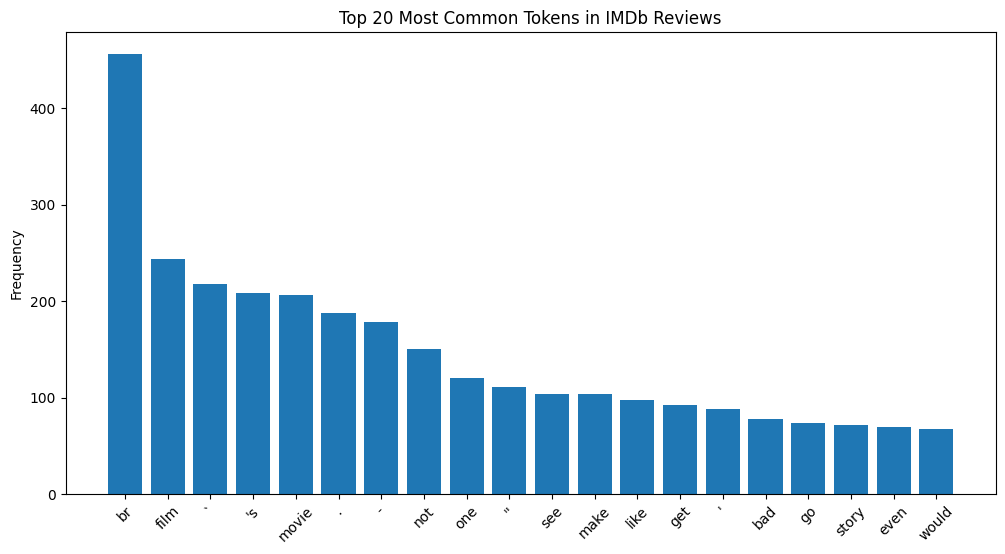

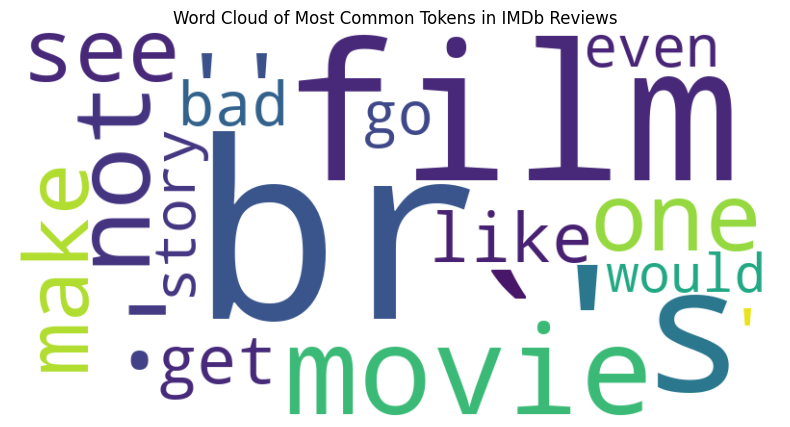

In [11]:
import matplotlib.pyplot as plt
from datasets import load_dataset
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
import nltk
import string
import spacy
from collections import Counter

# Download necessary resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Load spaCy model
nlp = spacy.load("en_core_web_sm")

# Load IMDb dataset
ds = load_dataset('imdb', split='train')

# Initialize tools
stop_words = set(stopwords.words('english'))
punctuation = string.punctuation
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

# Preprocess text: tokenize, remove punctuation, stopwords, and apply lemmatization
def preprocess_text(text, apply_stemming=False, apply_lemmatization=True):
    tokens = word_tokenize(text.lower())
    cleaned_tokens = [token for token in tokens if token not in punctuation and token not in stop_words]
    if apply_stemming:
        cleaned_tokens = [stemmer.stem(token) for token in cleaned_tokens]
    if apply_lemmatization:
        doc = nlp(" ".join(cleaned_tokens))
        cleaned_tokens = [token.lemma_ for token in doc]
    return cleaned_tokens

# Preprocess the first 100 reviews
all_tokens = []
for i in range(100):
    tokens = preprocess_text(ds[i]['text'])
    all_tokens.extend(tokens)

# Get the 20 most common tokens
common_tokens = Counter(all_tokens).most_common(20)
tokens, frequencies = zip(*common_tokens)

# Plot 1: Bar plot of the most common tokens
plt.figure(figsize=(12, 6))
plt.bar(tokens, frequencies)
plt.title('Top 20 Most Common Tokens in IMDb Reviews')
plt.xticks(rotation=45)
plt.ylabel('Frequency')
plt.show()

# Plot 2: Word cloud of the most common tokens
from wordcloud import WordCloud

wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dict(common_tokens))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Most Common Tokens in IMDb Reviews')
plt.show()